# Avocado Prices

## Context
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope... if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

## Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website: http://www.hassavocadoboard.com/retail/volume-and-price-data

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

**Some relevant columns in the dataset:**

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get the Data

In [2]:
avacado = pd.read_csv('avocado.csv')

In [3]:
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Drop unnecessary Column**

In [4]:
df = avacado.drop(['Unnamed: 0'], axis = 1)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


**Let's check for missing data**

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Exploratory Data Analysis


Let's begin some exploratory data analysis!

**Luck is definitely on our side! So we have a great set of data and the mood to experiment. Price is always important. The more expensive the better. Certainly not for buyers. Let's look at the price distribution of our favorite avocado!**

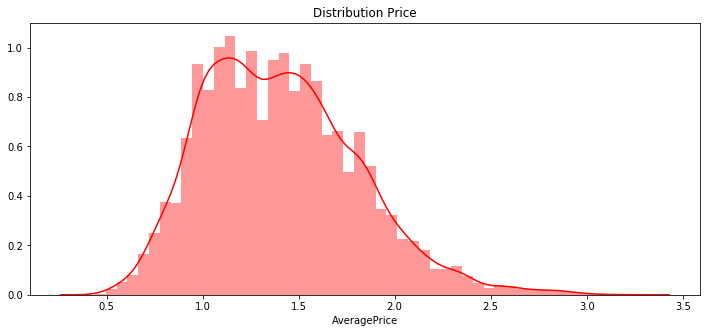

In [9]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'r')

Text(0.5, 1.0, 'Type of Avacado')

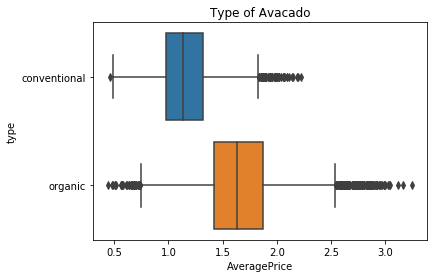

In [10]:
sns.boxplot(y="type", x="AveragePrice", data=df)
plt.title("Type of Avacado")

**Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them. But it is likely that the price of avocado depends not only on the type. Let's look at the price of avocado from different regions in different years. Let's start with organic avocados.**

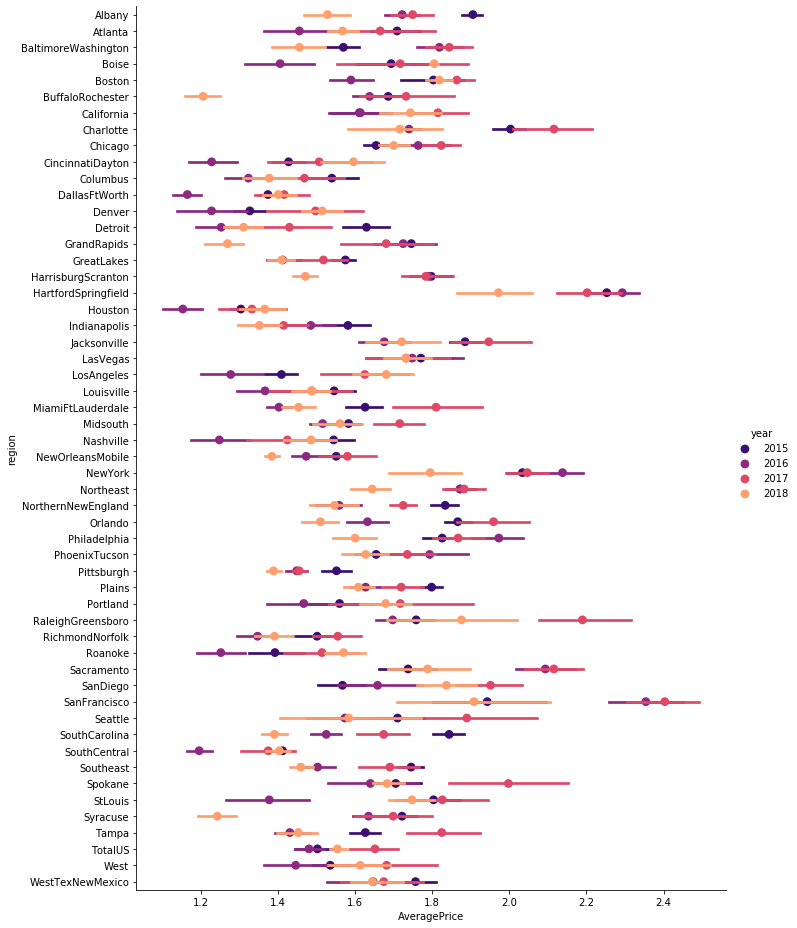

In [11]:
mask = df['type']=='organic'
sns.factorplot('AveragePrice','region',data=df[mask], hue='year', size=13, aspect=0.8, palette='magma', join=False)        

**Oh San Francisco, 2017. In 2017, organic avocados were very expensive Search in Google gave result on this question. In 2017, there was a shortage of avocados. That explains the price increase!**

In [45]:
# regions = df.groupby(df.region)
# PREDICTING_FOR = "TotalUS"
# date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

In [46]:
# date_price.plot(x='Date', y='AveragePrice', kind="line")

In [14]:
df['Month'] = df['Date'].dt.month

In [15]:
df['year'] = df['Date'].dt.year

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


**So, what about conventional type?**

In [17]:
#sns.factorplot('Month','AveragePrice',data=df[mask], hue='year', row='region', aspect=2, palette='Blues')

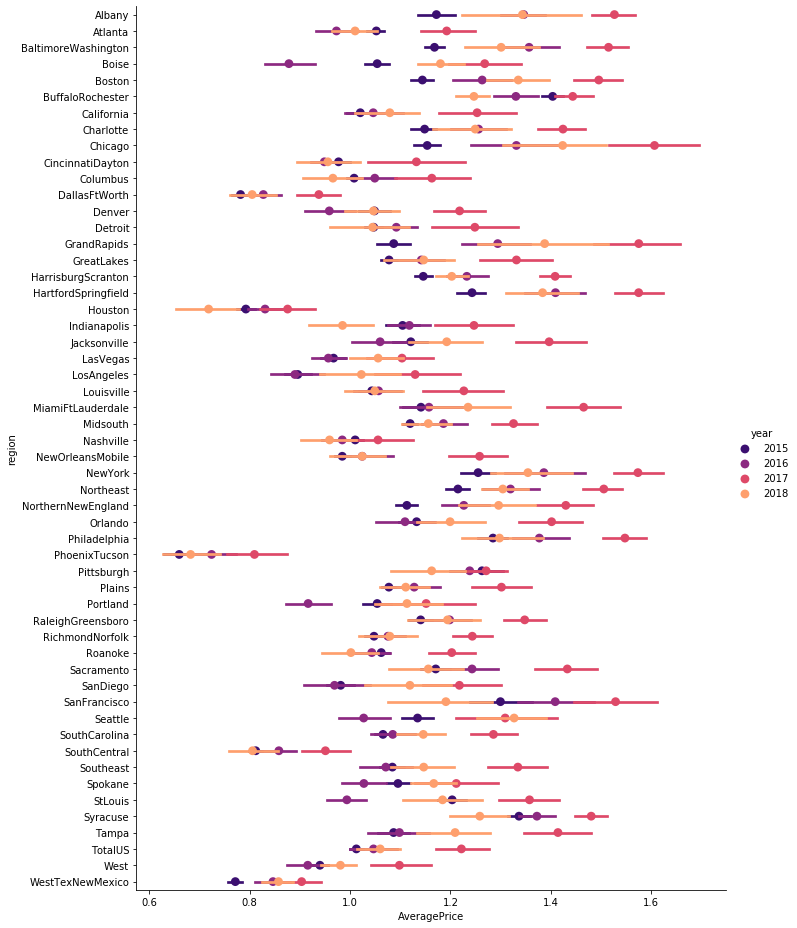

In [18]:
mask = df['type']=='conventional'
sns.factorplot('AveragePrice','region',data=df[mask], hue='year', size=13, aspect=0.8, palette='magma', join=False)

**For obvious reasons, prices are lower. The situation with the price increase in 2017 also affected this type of avocado.**

**Organic avocado type is more expensive. And avocado is generally more expensive with each passing year. Objection! lol. We're explorers. Let's see the correlation between these features. First, let's code the categorical attribute - "type".**

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type) 

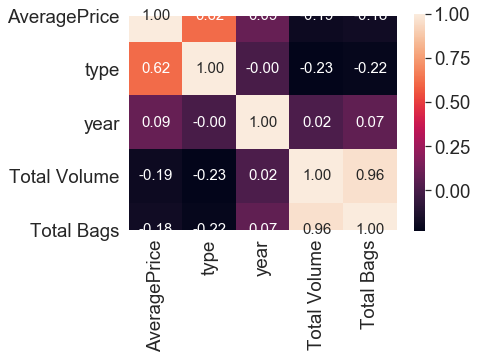

In [22]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

**The price of avocado is influenced by the type. Logically. We also see a strong correlation between the features: "Total Bags" and "Total Volume". Also, if you look at the correlation of all the features, you will notice that strongly correlated Small Bags,Large Bag. It is logical but can create problems if we go to predict the price of avocado. I could be wrong, though. I would be grateful to hear the opinion of more experienced people on this issue, thank you!**

Until I decided that can be try classified avocado on type. Organic or not? Experiment so experiment!

## Feature Selection

In [23]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11


In [24]:
df = df.drop(['Date'], axis = 1)

In [25]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null int32
year            18249 non-null int64
region          18249 non-null object
Month           18249 non-null int64
dtypes: float64(9), int32(1), int64(2), object(1)
memory usage: 1.7+ MB


## This allows any columns to be changed with the corresponding values.

In [27]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['type', 'region']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

**Compare the data at the beginning to now, ensuring no string value remains.**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null int64
year            18249 non-null int64
region          18249 non-null int32
Month           18249 non-null int64
dtypes: float64(9), int32(1), int64(3)
memory usage: 1.7 MB


## Train Test Split

We will predict Type

In [29]:
X = df.drop(['type','region'], axis = 1)
y = df.type

In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

# Using KNN

Remember that we are trying to come up with a model to predict whether someone will Predclass or not. We'll start with k=1

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,pred))

[[2662   64]
 [  84 2665]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2726
           1       0.98      0.97      0.97      2749

    accuracy                           0.97      5475
   macro avg       0.97      0.97      0.97      5475
weighted avg       0.97      0.97      0.97      5475



## Choosing a K Value


Let's go ahead and use the elbow method to pick a good K Value:

In [38]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

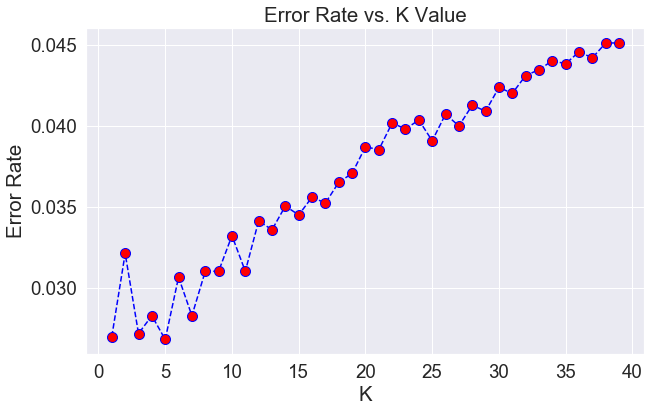

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Our accuracy is already good, we don't need to increase K value**

**Why not try Random Forest too?**

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

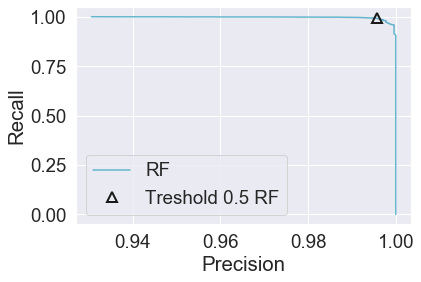

In [43]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

The curve of recall and precision suggests that this classifier works great! Let's look at the average precision and look at the rock curve.

In [44]:
from sklearn.metrics import average_precision_score
p_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
print("Average precision score Random Forest Classifier: {:.3f}".format(p_rf))

Average precision score Random Forest Classifier: 1.000


**The RandomForestClassifier has the highest accuracy. But KNeighborsClassifier will also help to know what type of avocado is in front of us.**